In [1]:
import barnaba as bb
import mdtraj as md

traj1 = md.load("SL1_REST_1.crop.xtc",top="sample_SL1.pdb",stride=10)
traj2 = md.load("SL1_REST_2.crop.xtc",top="sample_SL1.pdb",stride=10)

#stacking1,pairing1, res = bb.annotate_traj(traj1)
#stacking2,pairing2, res = bb.annotate_traj(traj2)

In [2]:
import barnaba as bb
gvecs1,res = bb.dump_gvec_traj(traj1)
gvecs2,res = bb.dump_gvec_traj(traj2)

In [3]:
import numpy as np
region_b = [11,12,13,14,15,16]
eloop1 = gvecs1[:,region_b,:,:]
eloop1 = eloop1[:,:,region_b,:]
eloop2 = gvecs2[:,region_b,:,:]
eloop2 = eloop2[:,:,region_b,:]

eloop_all = np.vstack([eloop1,eloop2])
print(eloop_all.shape)
eloop_all = eloop_all.reshape(eloop_all.shape[0],-1)


(24154, 6, 6, 4)


In [4]:
import barnaba.cluster as cc

vloop,wloop = cc.pca(eloop_all,nevecs=3)
#v2,w2 = cc.pca(gvecs2,nevecs=3)

print("# Cumulative explained variance of component: 1=%5.1f 2:=%5.1f 3=%5.1f" % (vloop[0]*100,vloop[1]*100,vloop[2]*100))


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
fig, axs = plt.subplots(1,1,figsize=(10,10))
plt.scatter(wloop[:gvecs1.shape[0],0],wloop[:gvecs1.shape[0],1],s=2,alpha=0.5)
plt.scatter(wloop[gvecs1.shape[0]:,0],wloop[gvecs1.shape[0]:,1],s=2,alpha=0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")

# Cumulative explained variance of component: 1= 21.6 2:= 38.1 3= 49.8


Text(0, 0.5, 'PC2')

In [5]:
new_labels_loop, center_idx_loop = cc.dbscan(eloop_all,range(eloop_all.shape[0]),eps=0.5,min_samples=150)


# eps:1.225 min_samples:150  nclusters: 14
#  silhouette score: 0.2545
# Avg silhouette: 0.4445 
# assigned samples :18075 total samples:24154 
#  N size       max eRMSD (IC)       med eRMSD (IC) max eRMSD (centroid) med eRMSD (centroid) center 
# 00 4909                1.499                0.685                1.042                0.523 10 5391
# 01 3139                1.414                0.666                1.101                0.439 07 11811
# 02 2868                1.376                0.719                1.138                0.469 05 2054
# 03 1479                1.330                0.740                0.860                0.573 01 1532
# 04 1212                1.157                0.618                0.865                0.475 03 3026
# 05 0929                1.233                0.636                0.800                0.485 02 114
# 06 0917                1.211                0.690                0.998                0.529 06 3779
# 07 0491                0.926          

t1 5391
t2 206
t1 2054
t1 1532
t1 3026
t1 114
t1 3779
t2 12423
t2 3729
t1 750
t1 7015
t1 4870
t1 4974
t1 9695


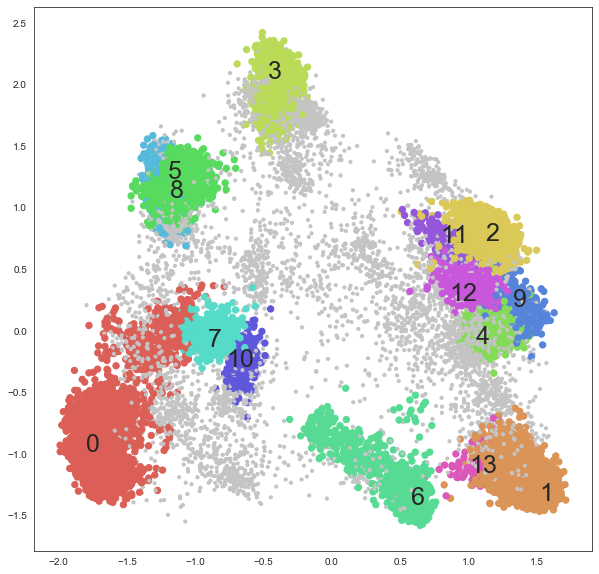

In [6]:
cp = sns.color_palette("hls",len(center_idx_loop)+1)
colors = [cp[j-1] if(j!=0) else (0.77,0.77,0.77) for j in new_labels_loop]
size = [40 if(j!=0) else 10 for j in new_labels_loop]
fig, axs = plt.subplots(1,1,figsize=(10,10))

#do scatterplot
lim = gvecs1.shape[0]
plt.scatter(wloop[:,0],wloop[:,1],s=size,c=colors)
for i,k in enumerate(center_idx_loop):
    plt.text(wloop[k,0],wloop[k,1],str(i),ha='center',va='center',fontsize=25)
    if(k>lim):
        print("t2",k-lim)
        traj2[k-lim].save("center_loop_%d.pdb" %i )
    else:
        print("t1",k)
        traj1[k].save("center_loop_%d.pdb" %i )

(11605,)
(12549,)


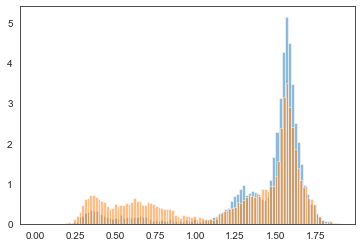

In [7]:
dist_c0_1 = eloop_all[center_idx_loop[0],:]-eloop1.reshape(eloop1.shape[0],-1)
dist_c0_1 = np.sqrt(np.sum(dist_c0_1**2,axis=1))/np.sqrt(6)
print(dist_c0_1.shape)
_ = plt.hist(dist_c0_1,bins=100,density=True,alpha=0.5)

dist_c0_2 = eloop_all[center_idx_loop[0],:]-eloop2.reshape(eloop2.shape[0],-1)
dist_c0_2 = np.sqrt(np.sum(dist_c0_2**2,axis=1))/np.sqrt(6)
print(dist_c0_2.shape)
_ = plt.hist(dist_c0_2,bins=100,density=True,alpha=0.5)

(11605,)
(12549,)


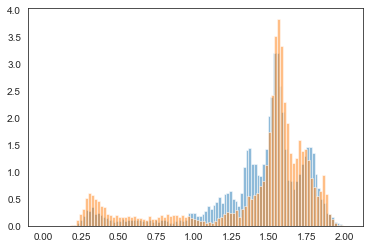

In [8]:
dist_c0_1 = eloop_all[center_idx_loop[1],:]-eloop1.reshape(eloop1.shape[0],-1)
dist_c0_1 = np.sqrt(np.sum(dist_c0_1**2,axis=1))/np.sqrt(6)
print(dist_c0_1.shape)
_ = plt.hist(dist_c0_1,bins=100,density=True,alpha=0.5)

dist_c0_2 = eloop_all[center_idx_loop[1],:]-eloop2.reshape(eloop2.shape[0],-1)
dist_c0_2 = np.sqrt(np.sum(dist_c0_2**2,axis=1))/np.sqrt(6)
print(dist_c0_2.shape)
_ = plt.hist(dist_c0_2,bins=100,density=True,alpha=0.5)

In [9]:
region_a = [5,6,7,21,22,23,24]
int_loop1 = gvecs1[:,region_a,:,:]
int_loop1 = int_loop1[:,:,region_a,:]
int_loop2 = gvecs2[:,region_a,:,:]
int_loop2 = int_loop2[:,:,region_a,:]

int_loop_all = np.vstack([int_loop1,int_loop2])
print(int_loop_all.shape)
int_loop_all = int_loop_all.reshape(int_loop_all.shape[0],-1)



(24154, 7, 7, 4)


# Cumulative explained variance of component: 1= 34.2 2:= 56.8 3= 66.6


Text(0, 0.5, 'PC2')

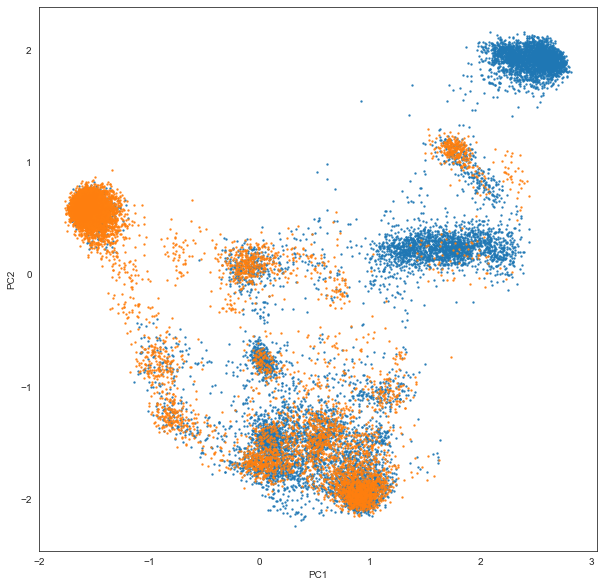

In [10]:
vint,wint = cc.pca(int_loop_all,nevecs=3)
#v2,w2 = cc.pca(gvecs2,nevecs=3)

print("# Cumulative explained variance of component: 1=%5.1f 2:=%5.1f 3=%5.1f" % (vint[0]*100,vint[1]*100,vint[2]*100))


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
fig, axs = plt.subplots(1,1,figsize=(10,10))
plt.scatter(wint[:gvecs1.shape[0],0],wint[:gvecs1.shape[0],1],s=2,alpha=0.8)
plt.scatter(wint[gvecs1.shape[0]:,0],wint[gvecs1.shape[0]:,1],s=2,alpha=0.8)

plt.xlabel("PC1")
plt.ylabel("PC2")

In [11]:
new_labels, center_idx = cc.dbscan(int_loop_all,range(int_loop_all.shape[0]),eps=0.5,min_samples=150)

# eps:1.323 min_samples:150  nclusters: 13
#  silhouette score: 0.4472
# Avg silhouette: 0.5105 
# assigned samples :22324 total samples:24154 
#  N size       max eRMSD (IC)       med eRMSD (IC) max eRMSD (centroid) med eRMSD (centroid) center 
# 00 10311                1.499                0.387                1.228                0.294 09 22361
# 01 2810                1.208                0.584                0.796                0.454 01 5180
# 02 2528                1.263                0.501                0.937                0.377 06 10230
# 03 1990                1.367                0.614                0.928                0.469 00 7904
# 04 1526                1.332                0.669                0.925                0.500 02 8706
# 05 0667                1.044                0.543                0.761                0.426 07 15957
# 06 0536                1.100                0.504                0.834                0.371 03 10202
# 07 0516                1.028     

t2 10756
t1 5180
t1 10230
t1 7904
t1 8706
t2 4352
t1 10202
t1 8008
t1 5081
t2 9450
t1 5891
t1 7967
t2 7293


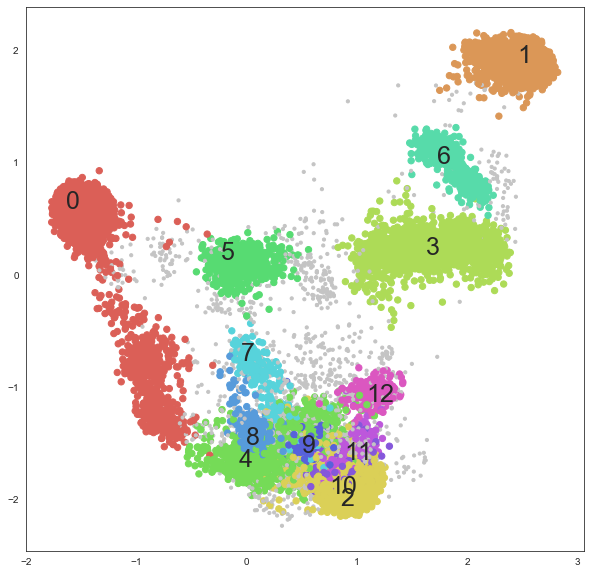

In [12]:
cp = sns.color_palette("hls",len(center_idx)+1)
colors = [cp[j-1] if(j!=0) else (0.77,0.77,0.77) for j in new_labels]
size = [40 if(j!=0) else 10 for j in new_labels]
fig, axs = plt.subplots(1,1,figsize=(10,10))

#do scatterplot
lim = gvecs1.shape[0]
plt.scatter(wint[:,0],wint[:,1],s=size,c=colors)
for i,k in enumerate(center_idx):
    plt.text(wint[k,0],wint[k,1],str(i),ha='center',va='center',fontsize=25)
    if(k>lim):
        print("t2",k-lim)
        traj2[k-lim].save("center_int_%d.pdb" %i )
    else:
        print("t1",k)
        traj1[k].save("center_int_%d.pdb" %i )

(11605,)
(12549,)


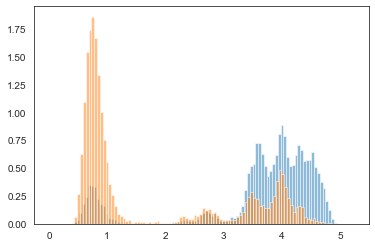

In [13]:
dist_c0_1 = int_loop_all[center_idx[0],:]-int_loop1.reshape(int_loop1.shape[0],-1)
dist_c0_1 = np.sqrt(np.sum(dist_c0_1**2,axis=1))
print(dist_c0_1.shape)
_ = plt.hist(dist_c0_1,bins=100,density=True,alpha=0.5)

dist_c0_2 = int_loop_all[center_idx[0],:]-int_loop2.reshape(int_loop2.shape[0],-1)
dist_c0_2 = np.sqrt(np.sum(dist_c0_2**2,axis=1))
print(dist_c0_2.shape)
_ = plt.hist(dist_c0_2,bins=100,density=True,alpha=0.5)




(11605,)
(12549,)


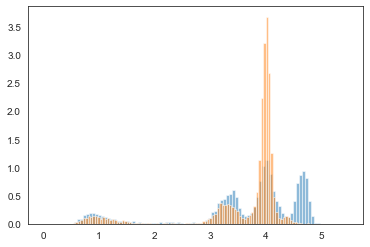

In [14]:
dist_c2_1 = int_loop_all[center_idx[2],:]-int_loop1.reshape(int_loop1.shape[0],-1)
dist_c2_1 = np.sqrt(np.sum(dist_c2_1**2,axis=1))
print(dist_c0_1.shape)
_ = plt.hist(dist_c2_1,bins=100,density=True,alpha=0.5)

dist_c2_2 = int_loop_all[center_idx[2],:]-int_loop2.reshape(int_loop2.shape[0],-1)
dist_c2_2 = np.sqrt(np.sum(dist_c2_2**2,axis=1))
print(dist_c0_2.shape)
_ = plt.hist(dist_c2_2,bins=100,density=True,alpha=0.5)


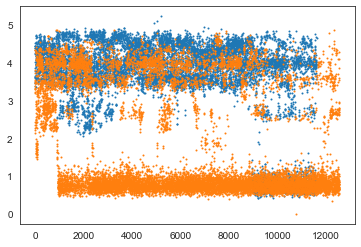

In [21]:
plt.plot(dist_c0_1,"-o",ms=1,lw=0)
plt.plot(dist_c0_2,"-o",ms=1,lw=0)

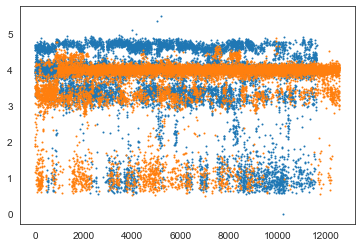

In [16]:
plt.plot(dist_c2_1,"-o",ms=1,lw=0)
plt.plot(dist_c2_2,"-o",ms=1,lw=0)

In [17]:
kink0 = np.loadtxt("kink1.dat")
kink1 = np.loadtxt("kink2.dat")
dists0 = np.loadtxt("DIST_O_1")
dists1 = np.loadtxt("DIST_O_2")

import seaborn as sns
from scipy import stats
kbt = 0.008314462*300

cp = sns.color_palette("muted",3)
def plot_fes(data1,data2,title="",bins=100,regions=[],lims=[],out=""):

    
    min1,min2 =  np.min(data1), np.min(data2)
    max1,max2 =  np.max(data1), np.max(data2)
    
    ee1 = np.linspace(np.min([min1,min2]),np.max([max1,max2]),150)
    ee2 = np.linspace(np.min([min1,min2]),np.max([max1,max2]),150)
    
    xx1 = np.linspace(np.min([min1,min2]),np.max([max1,max2]),150)
    xx2 = np.linspace(np.min([min1,min2]),np.max([max1,max2]),150)

    kernel1 = stats.gaussian_kde(data1,bw_method=0.015/data1.std(ddof=1))
    hh1 = kernel1(ee1)
    kernel2 = stats.gaussian_kde(data2,bw_method=0.015/data2.std(ddof=1))
    hh2 = kernel2(ee2)
    
    #hh1,ee1 = np.histogram(data1,bins=bins,density=True)
    #hh2,ee2 = np.histogram(data2,bins=bins,density=True)
    
    #xx1 = 0.5*(ee1[1:]+ee1[:-1])
    #xx2 = 0.5*(ee2[1:]+ee2[:-1])
    #print(xx1.shape)
    fes1 = -kbt*np.log(hh1)
    fes1 -= np.min(fes1)
    fes2 = -kbt*np.log(hh2)
    fes2 -= np.min(fes2)
    
    fig,axs = plt.subplots(1,2,figsize=(16,7))
    #fig.suptitle(title)
    axs[0].plot(xx1,fes1,c="k",label="Run 1")
    axs[0].plot(xx2,fes2,c="0.5",label="Run 2")
    axs[0].legend()
    
    for k in range(len(regions)):
        axs[0].text(0.5*(regions[k][1]+regions[k][0]),9,regions[k][2],fontsize=20,ha="center",va="center")
        axs[0].axvspan(regions[k][0],regions[k][1],alpha=0.3,color=cp[k])
        
        ii1 = np.where((xx1<=regions[k][1])&(xx1>regions[k][0]))
        ii2 = np.where((xx2<=regions[k][1])&(xx2>regions[k][0]))
        print("Pop %s %7.3f %7.3f " % (regions[k][2],100*np.sum(hh1[ii1])/np.sum(hh1) , 100*np.sum(hh2[ii2])/np.sum(hh2)))
    axs[0].set_ylabel("FES [kJ/mol]")
    axs[0].set_ylim(-1,20)
    
    time1 = range(len(data1))
    time2 = range(len(data2))
    axs[1].scatter(time1,data1,c="k",s=0.5)
    axs[1].scatter(time2,data2,c="0.7",s=0.5)
    axs[1].set_xlabel("Time [$\mu$s]")
    axs[0].set_xlabel(title)
    axs[1].set_ylabel(title)
    if(len(lims)==2):
        axs[0].set_xlim(lims[0],lims[1])
        axs[1].set_ylim(lims[0],lims[1])
    if(out==""):    
        plt.show()
    else:
        plt.savefig(out)
    plt.close()
    


#_ = plt.hist(dists0[:,1],bins=100,density=True)

Pop A  53.391  56.501 


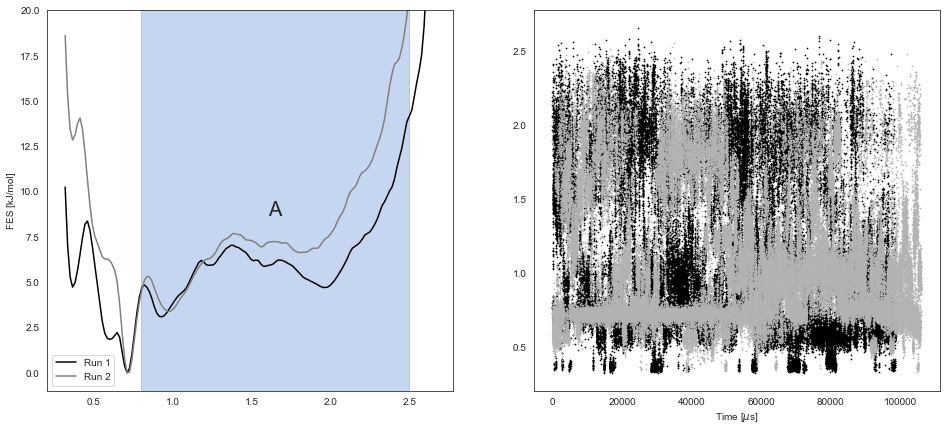

In [18]:
#plot_fes(dists0[:,1],dists1[:,1],regions=[[1.1,2.5,"A"]])
#plot_fes(dists0[:,2],dists1[:,2],regions=[[1.1,2.5,"A"]])
plot_fes(dists0[:,3],dists1[:,3],regions=[[0.8,2.5,"A"]])
#_ = plt.hist(dists0[:,1],bins=100,density=True,alpha=0.5)
#_ = plt.hist(dists1[:,1],bins=100,density=True,alpha=0.5)
#plt.show()
#plt.close()

#_ = plt.hist(dists0[:,2],bins=100,density=True,alpha=0.5)
#_ = plt.hist(dists1[:,2],bins=100,density=True,alpha=0.5)
#plt.show()

Pop A  12.191   3.797 


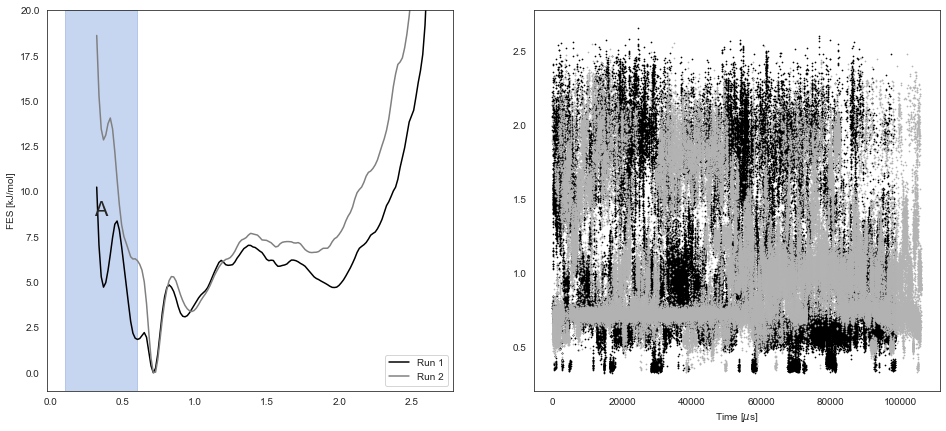

In [19]:
plot_fes(dists0[:,3],dists1[:,3],regions=[[0.1,0.6,"A"]])


In [20]:
bulge_22_1 = np.where(dists0[:,1]>1.1)
notbulge_22_1 = np.where(dists0[:,1]<=1.1)
print(np.average(kink0[:,3]))
print(np.average(kink0[bulge_22_1,3]))
print(np.average(kink0[notbulge_22_1,3]))

bulge_23_1 = np.where(dists0[:,2]>1.1)
notbulge_23_1 = np.where(dists0[:,2]<=1.1)
print(np.average(kink0[:,3]))
print(np.average(kink0[bulge_23_1,3]))
print(np.average(kink0[notbulge_23_1,3]))
print("AAA")
bulge_22_2 = np.where(dists1[:,1]>1.1)
notbulge_22_2 = np.where(dists1[:,1]<=1.1)
print(np.average(kink1[:,3]))
print(np.average(kink1[bulge_22_2,3]))
print(np.average(kink1[notbulge_22_2,3]))

bulge_23_2 = np.where(dists1[:,2]>1.1)
notbulge_23_2 = np.where(dists1[:,2]<=1.1)
print(np.average(kink1[:,3]))
print(np.average(kink1[bulge_23_2,3]))
print(np.average(kink1[notbulge_23_2,3]))

145.6167998964765
150.94311330815674
145.272055810123
145.6167998964765
111.93336864503853
148.15848059585923
AAA
159.23536668262136
140.6991179594336
159.59115668873997
159.23536668262136
116.81961203268851
160.310873953488


# Cumulative explained variance of component: 1= 22.4 2:= 32.7 3= 39.6


Text(0, 0.5, 'PC2')

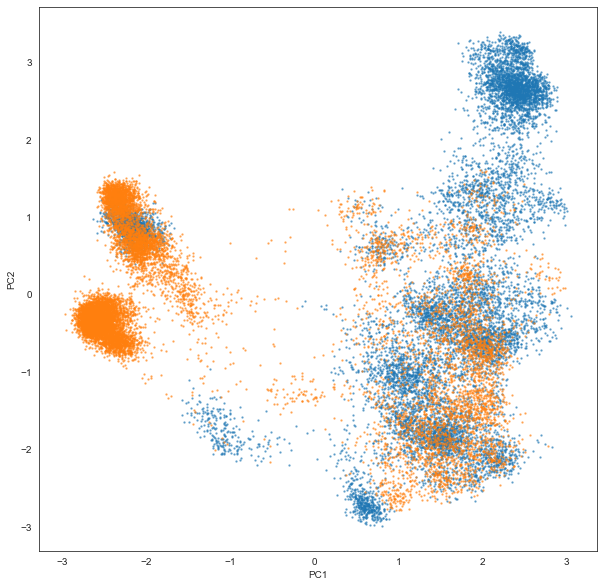

In [22]:
gvecs_all = np.vstack([gvecs1,gvecs2])
gvecs_all = gvecs_all.reshape(gvecs_all.shape[0],-1)

vloop,wloop = cc.pca(gvecs_all,nevecs=3)
#v2,w2 = cc.pca(gvecs2,nevecs=3)

print("# Cumulative explained variance of component: 1=%5.1f 2:=%5.1f 3=%5.1f" % (vloop[0]*100,vloop[1]*100,vloop[2]*100))




Text(0, 0.5, 'PC2')

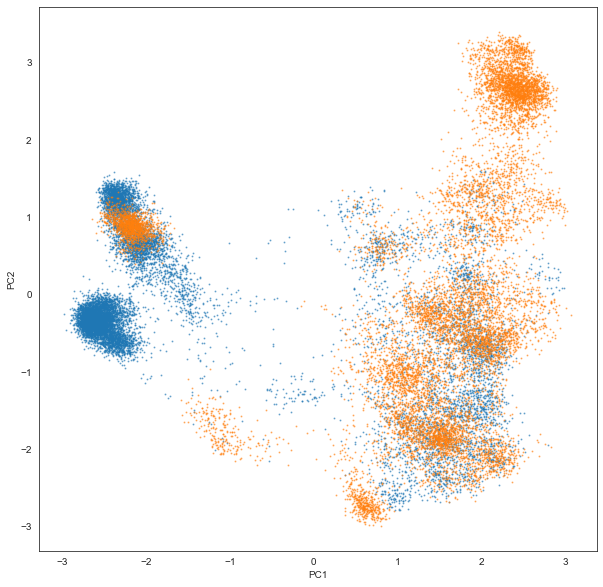

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
fig, axs = plt.subplots(1,1,figsize=(10,10))
plt.scatter(wloop[gvecs1.shape[0]:,0],wloop[gvecs1.shape[0]:,1],s=1,alpha=0.5)

plt.scatter(wloop[:gvecs1.shape[0],0],wloop[:gvecs1.shape[0],1],s=1,alpha=0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")

In [25]:
new_labels_all, center_idx_all = cc.dbscan(gvecs_all,range(gvecs_all.shape[0]),eps=0.5,min_samples=150)

# eps:2.693 min_samples:150  nclusters: 12
#  silhouette score: 0.0202
# Avg silhouette: 0.2815 
# assigned samples :11237 total samples:24154 
#  N size       max eRMSD (IC)       med eRMSD (IC) max eRMSD (centroid) med eRMSD (centroid) center 
# 00 4469                1.063                0.592                0.838                0.477 07 21233
# 01 1981                0.975                0.570                0.736                0.464 06 13849
# 02 1052                0.944                0.605                0.737                0.492 05 11573
# 03 0974                0.875                0.552                0.633                0.455 04 7160
# 04 0548                0.830                0.536                0.670                0.450 02 10230
# 05 0483                0.786                0.501                0.603                0.429 11 22361
# 06 0470                0.834                0.554                0.638                0.476 00 2680
# 07 0453                0.744     

t2 9628
t2 2244
t1 11573
t1 7160
t1 10230
t2 10756
t1 2680
t2 9982
t1 6307
t2 10001
t2 5761
t1 1032


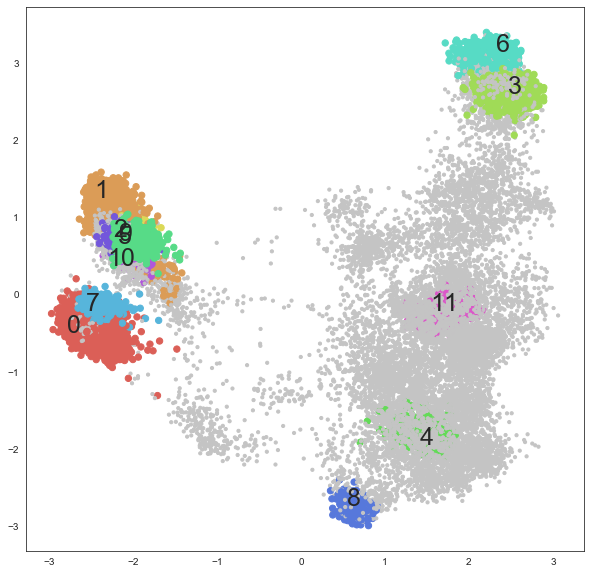

In [27]:
cp = sns.color_palette("hls",len(center_idx_all)+1)

colors = [cp[j-1] if(j!=0) else (0.77,0.77,0.77) for j in new_labels_all]
size = [40 if(j!=0) else 10 for j in new_labels_all]
fig, axs = plt.subplots(1,1,figsize=(10,10))

#do scatterplot
lim = gvecs1.shape[0]
plt.scatter(wloop[:,0],wloop[:,1],s=size,c=colors)
for i,k in enumerate(center_idx_all):
    plt.text(wloop[k,0],wloop[k,1],str(i),ha='center',va='center',fontsize=25)
    if(k>lim):
        print("t2",k-lim)
        traj2[k-lim].save("center_all_%d.pdb" %i )
    else:
        print("t1",k)
        traj1[k].save("center_all_%d.pdb" %i )